# Исследование объявлений о продаже квартир

# Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Для начала импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Откроем датасет и сохраним в переменную 'data'
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Выведем первые 20 строк 
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Выведем общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Краткое описание каждого столбца**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [5]:
# Приведем наименование некоторых столбцов в понятный и надлежащий вид (стиль snake_case)
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3km',
        'ponds_around3000': 'ponds_around_3km',}
)

In [6]:
# Выведем обновленный список столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

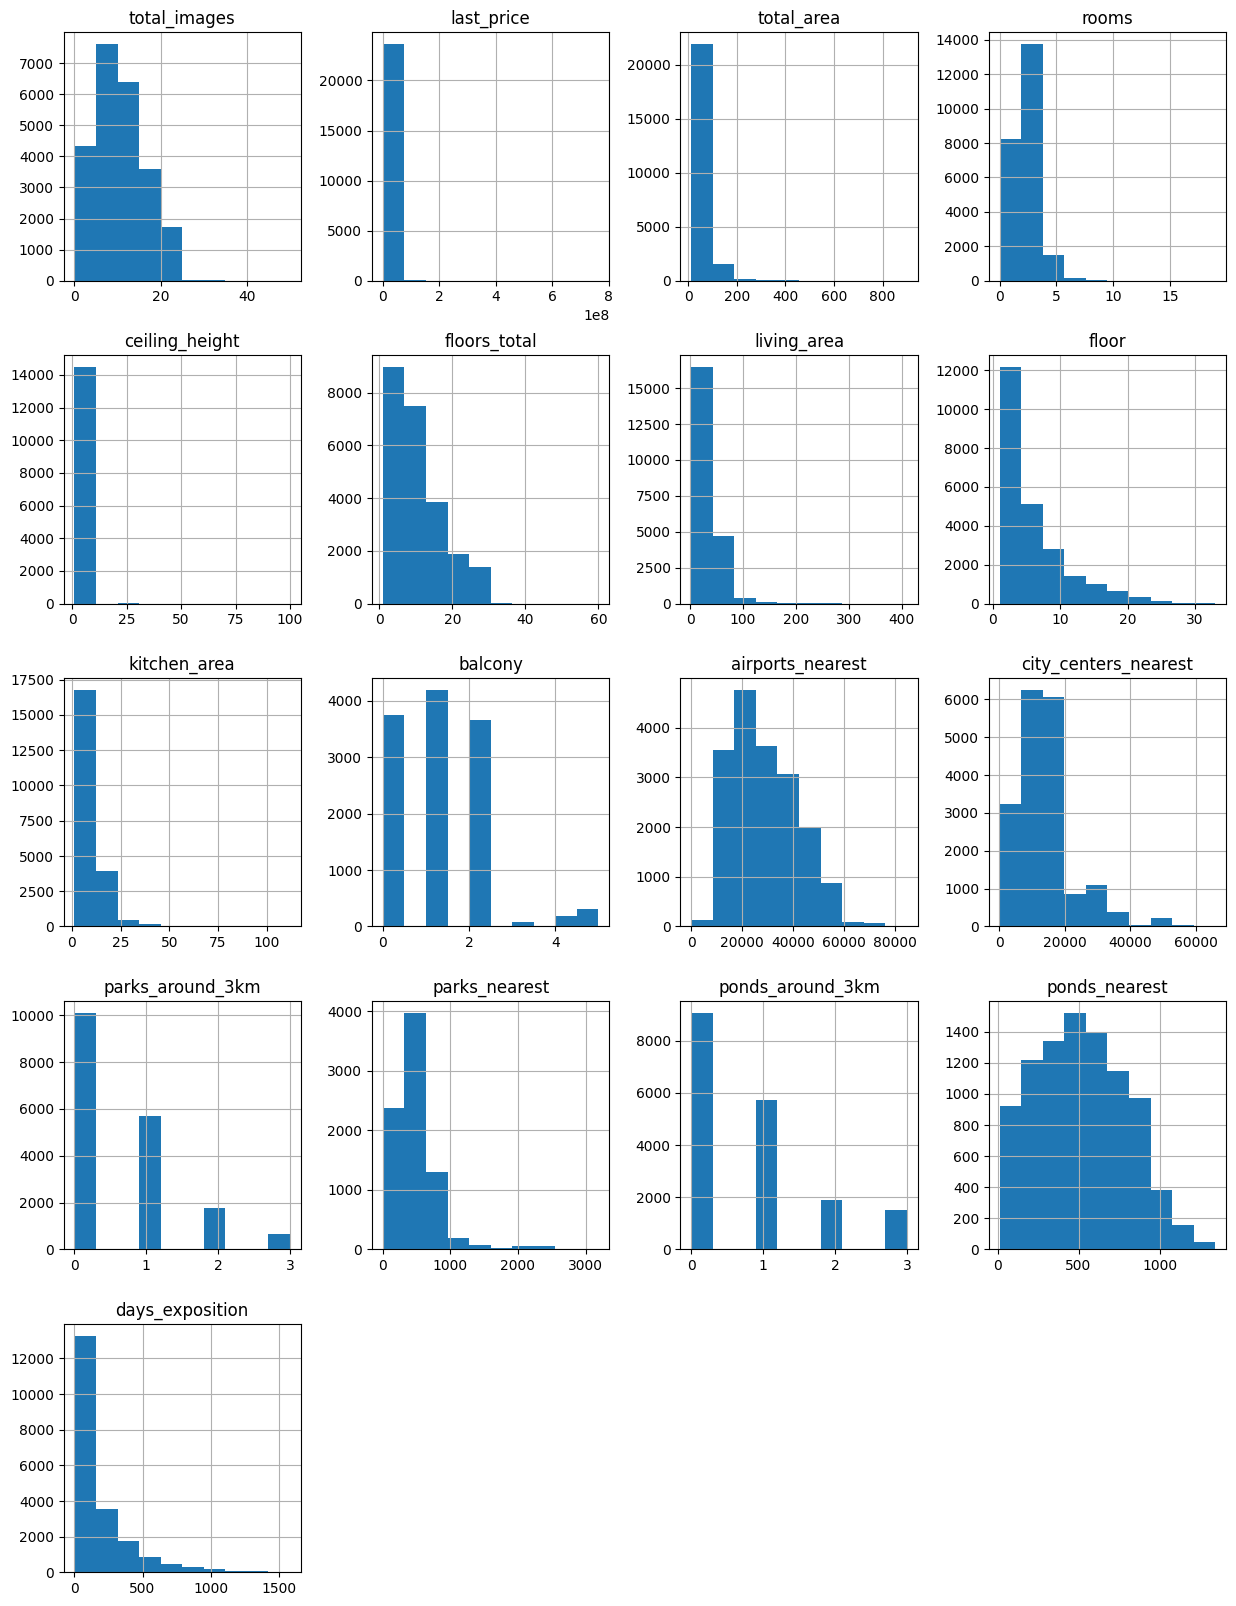

In [7]:
# Построим гистограммы для столбцов с некатегориальными данными 
data.hist(figsize=(15,20));

По построенным гистограмам сделать какие-либо выводы не получится, так как в датасете много пропусков и выбросов значений. Имеет смысл отфильтровать и заполнить данные там, где это возможно, а после, провести анализ и ответить на вопросы в рамках данного исследования. 

### Предобработка данных

Воспользуемся функцией "describe" для оценки столбцов с числовым типом данных (int или float), которая возвращает статистические данные и дает представление о распределении значений.

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отображение 'float' значений некооректно выводится в таблице, поэтому исправим этот момент

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


По выведенной таблице сразу можно заметить разнородность в количестве заполненных строк(`count`), средних значений/медиан(`mean` и `50%`) и выбросов(`max` и `min`) в характерных графах. Поэтому первым делом стоит предобработка данных.

In [11]:
# Найдем дубликаты
data.duplicated().sum()

0

In [12]:
# Посчитаем количество пропусков для каждого столбца сочетанием функций "isna()" и "sum()"
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**В некоторых столбцах процент пропусков достигает более 60% (`parks_nearest`, `ponds_nearest`), а в одном и все 88% (`is_apartment`). В рамках данного исследования не все значения датасета будут использоваться для формулирования выводов, поэтому некоторые столбцы имеет смысл заполнять аномально высокими величинами, либо полное удаление ненужного столбца. Также, есть столбцы прямовлияющие на результаты исследования, но заполнение пропущенных значений в этих столбцах корректными данными не представляется возможным, ввиду неполноты или недостоверности информации, ведь, как было указано в описании исследования, одни данные вписаны пользователем, вторые — получены автоматически на основе картографических изысканий. Возможные причины возникновения пропусков: некорректная выгрузка датасета, неполнота/некорректность заполнения данных пользователем при создании объявления, либо проблемы с автоматическим заполнением на основе картографических данных** 

#### Изменим тип отображения даты и времени в столбце 'first_day_exposition' функцией "pd.to_datetime"

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
# Проверим работу функции, отобразив первые 10 строк датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


#### Переведем данные в столбцах с значениями расстояний до объектов инфраструктуры (м в км)

In [15]:
data[['airports_nearest', 'city_centers_nearest']] = round(data[['airports_nearest', 'city_centers_nearest']] / 1000)

In [16]:
# Проверим результат, отобразив интересующие нас столбцы
data[['airports_nearest', 'city_centers_nearest']]

,airports_nearest,city_centers_nearest
0,19.00,16.00
1,13.00,19.00
2,22.00,14.00
3,28.00,7.00
4,32.00,8.00
...,...,...
23694,25.00,4.00
23695,NaN,NaN
23696,NaN,NaN
23697,39.00,10.00


In [17]:
# Переведем м в км, округляя значения до 1 знака после запятой
data[['parks_nearest', 'ponds_nearest']] = round((data[['parks_nearest', 'ponds_nearest']] / 1000), 1)

In [18]:
data[['parks_nearest', 'ponds_nearest']]

,parks_nearest,ponds_nearest
0,0.50,0.80
1,NaN,NaN
2,0.10,0.60
3,0.10,0.20
4,0.10,0.00
...,...,...
23694,0.80,0.40
23695,NaN,NaN
23696,NaN,NaN
23697,0.20,0.20


#### Удалим столбец  'is_apartment'

In [19]:
# Выведем количество пропусков
data['is_apartment'].isna().sum()

20924

In [20]:
data.query('is_apartment.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,19.00,16.00,1.00,0.50,2.00,0.80,NaN
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,13.00,19.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,22.00,14.00,1.00,0.10,2.00,0.60,558.00
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28.00,7.00,2.00,0.10,3.00,0.20,424.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,32.00,8.00,2.00,0.10,1.00,0.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5.00,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,25.00,4.00,1.00,0.80,3.00,0.40,NaN
23695,14,3100000.00,59.00,2018-01-15,3,NaN,5.00,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11,2,NaN,3.00,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17.00,NaN,12,NaN,...,23.30,2.00,Санкт-Петербург,39.00,10.00,2.00,0.20,3.00,0.20,602.00


Пропущенных значений больше 80%; в рамках этого исследования данный столбец не влияет на результаты

In [21]:
# Воспользуемся функцией "drop()" 
data = data.drop('is_apartment', axis=1)

In [22]:
# Проверка успешности кода
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          21421 non-null  float64       
 12  balcony               12180 non-null  float64       
 13  locality_name   

#### Заполним пропуски в столбце 'balcony'

In [23]:
# Отображение уникальных значений функцией "value_counts()"
data['balcony'].value_counts()

1.00    4195
0.00    3758
2.00    3659
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

In [24]:
# Заполним пропуски 0-ым значением
data['balcony'] = data['balcony'].fillna(0)

In [25]:
# Проверка выполненного кода
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [26]:
# Выведем сводную таблицу для отображения отношения количества балконов к медианной площади квартир 
data.pivot_table(index='balcony', values='total_area', aggfunc='median')

,total_area
balcony,
0.00,52.10
1.00,48.50
2.00,52.00
3.00,74.40
4.00,75.00
5.00,71.80


4-5 балконов на квадратуру квартир равную 70-75 м2 - это явный признак некорректности данных. Посмотрим на данные внимательно   

In [27]:
# Отфильтруем значения через функцию "query()", отсортировав по убыванию квадратуры площади с помощью функции "sort_values()"
data.query('balcony > 3 and total_area <= 80').sort_values('total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
5807,17,8150000.00,80.00,2019-01-09,2,27.00,36.00,41.00,13,False,...,12.00,5.00,Санкт-Петербург,19.00,20.00,0.00,NaN,3.00,0.10,38.00
20438,12,8700000.00,80.00,2018-04-13,2,2.70,16.00,40.00,10,False,...,13.00,5.00,Санкт-Петербург,13.00,14.00,1.00,0.40,1.00,0.20,NaN
3429,6,13990000.00,80.00,2017-05-04,3,NaN,25.00,40.00,23,False,...,18.00,5.00,Санкт-Петербург,19.00,4.00,0.00,NaN,0.00,NaN,42.00
8157,13,5400000.00,80.00,2019-02-25,2,2.70,9.00,39.00,5,False,...,13.00,5.00,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18825,5,7347000.00,79.88,2016-11-28,3,3.00,4.00,49.30,2,False,...,10.10,4.00,Санкт-Петербург,45.00,21.00,0.00,NaN,0.00,NaN,349.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11586,5,3445000.00,35.95,2018-08-28,1,2.55,22.00,NaN,19,False,...,9.65,5.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,239.00
13648,8,3300000.00,35.00,2018-09-21,1,2.70,16.00,15.00,14,False,...,9.00,5.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,162.00
16553,0,1650000.00,33.50,2018-07-03,1,2.80,5.00,NaN,5,False,...,NaN,4.00,Луга,NaN,NaN,NaN,NaN,NaN,NaN,7.00
7932,10,2888000.00,30.20,2016-11-09,1,2.53,9.00,15.00,2,False,...,8.00,5.00,Санкт-Петербург,33.00,10.00,0.00,NaN,0.00,NaN,675.00


4-5 балконов также характерны для однокомнатных квартир или квартир-студий...

О некорректности данных в этом столбце можно не сомневаться

In [28]:
# С помощью функции "query()" присвоим новые значения для отфильтрованных данных
data.loc[(data['balcony'] > 3) & (data['total_area'] <= 80), 'balcony'] = 2

In [29]:
# Проверим 
data.pivot_table(index='balcony', values='total_area', aggfunc='median')

,total_area
balcony,
0.00,52.10
1.00,48.50
2.00,53.00
3.00,74.40
4.00,96.00
5.00,97.00


In [30]:
# Изменим тип на 'int'
data['balcony'] = data['balcony'].astype(int)

In [31]:
data['balcony'].dtype

dtype('int32')

#### Предобработаем данные в столбце 'locality_name'

In [32]:
data['locality_name'].isna().sum()

49

Количество пропусков составляет 49 штук - это 0,2% от всего датафрейма. Можно удалить пропущенные значения

In [33]:
# Удаление пропусков функцией "dropna()"
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [34]:
data['locality_name'].isna().sum()

0

In [35]:
# Посмотрим на уникальные значения вызвав функцию "unique()"
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
len(data['locality_name'].unique())

364

Как можно заметить в столбце присутствуют неявные дубликаты и это, в основном, связано с различным написанием типов населенных пунктов. Самым простым способом является отсекание наименования типа населенного пункта от самого названия. В данном случае сами названия определены с заглавных букв('посёлок Новый Свет', 'село Путилово', 'деревня Кальтино'), что можно использовать для дальнейшего вычленения искомого значения, но не рекомендуется в последующих исследованиях. 

Напишем функцию, которая на входе будет получать наименование населенного пункта, а далее, с помощью цикла, будет проверять соответствие каждой буквы наименования ее прописному варианту написания, и, несоответствие пропуску в виде пробела. В случае соблюдения условий, функция возвращает индекс прописной буквы.

In [37]:
def find_upper_letter(name):
    for letter in name:
        if (letter == letter.upper() and letter != ' '):
            return name.index(letter)

С помощью цикла "for" переберем уникальные значения в 'locality_name' и через самописную функцию "find_upper_letter" изменим значения в ячейках

In [38]:
for names in data['locality_name'].unique():
    index = find_upper_letter(names)
    data.loc[data['locality_name'] == names, 'locality_name'] = names[index:]

In [39]:
# Проверим количество уникальных значений
len(data['locality_name'].unique())

305

In [40]:
# Посмотрим на результат работы кода
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Предобработка данных в столбце 'ceiling_height'

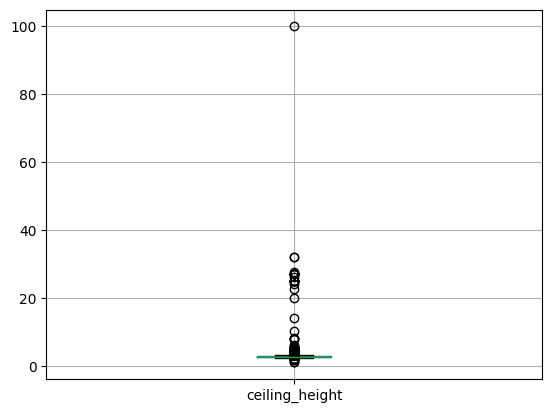

In [41]:
# Построим диаграмму размаха
data.boxplot(column='ceiling_height')
plt.show()

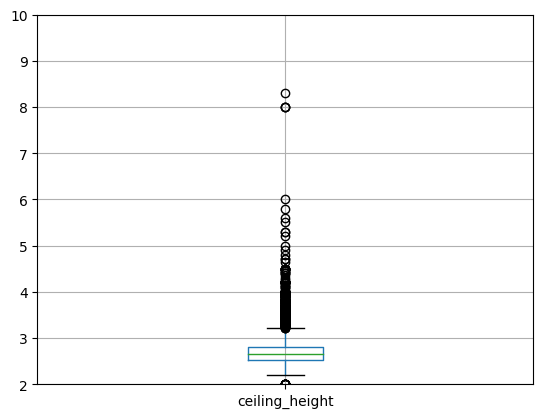

In [42]:
# Увеличим масштаб через метод "plt.ylim()"
data.boxplot(column='ceiling_height')
plt.ylim(2, 10)
plt.show()

Как видно на двух графиках столбец имеет существенные выбросы (от 2 м до 100 м), но можно обратиться к строительным нормам и правилам(СНИП или СП), чтобы посмотреть регламентированные высоты для помещений 

Опираясь на **`СП 54.13330.2022 «СНиП 31-01-2003 Здания жилые многоквартирные»:`** 
5.12 Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в климатических подрайонах строительства `IА, IБ, IГ, IД и IVА`, определяемых по СП 131.13330, должна быть не менее `2,7 м`, а в других климатических подрайонах строительства - не менее `2,5 м`; климатический район города Санкт-Петербург `IIB` по карте ГОСТ 16350-80; мы можем сделать вывод, что минимально допустимая высота - это 2,5 м 

In [43]:
# Выведем строки с аномальными высотами
data.query('ceiling_height < 2.5 or ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
193,6,7920000.00,83.80,2017-08-17,4,2.47,9.00,55.90,9,False,...,9.80,1,Санкт-Петербург,30.00,8.00,0.00,NaN,1.00,0.30,155.00
227,13,2200000.00,47.00,2018-01-12,3,2.34,5.00,NaN,1,False,...,NaN,0,Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.00
355,17,3600000.00,55.20,2018-07-12,2,25.00,5.00,32.00,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00
552,11,2999000.00,33.50,2017-03-30,1,2.00,15.00,17.50,6,False,...,6.50,0,Санкт-Петербург,34.00,12.00,1.00,0.50,1.00,0.90,270.00
632,20,3350000.00,35.00,2017-11-14,2,2.45,9.00,21.00,9,False,...,6.00,2,Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,14,4000000.00,98.00,2018-03-15,4,27.00,2.00,73.00,2,False,...,9.00,1,Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.00
22912,17,2300000.00,53.60,2018-10-18,2,2.00,2.00,19.00,1,False,...,10.00,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23073,20,4290000.00,35.20,2018-09-12,1,2.47,14.00,20.00,7,False,...,7.80,1,Санкт-Петербург,8.00,13.00,1.00,0.50,0.00,NaN,41.00
23447,7,3300000.00,55.30,2018-06-19,2,2.45,14.00,31.00,2,False,...,8.40,3,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,62.00


In [44]:
# Найдем медианное значение высоты, используя функцию "median()" по отфильтрованным данным
data.query('2.5 <= ceiling_height <= 6')['ceiling_height'].median()

2.65

In [45]:
# Заполним пропуски медианным значением
height_median = data.query('2.5 <= ceiling_height <= 6')['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_median)

In [46]:
# Очистим датасет от строк с аномальными величинами высоты помещений
data = data.query('2.5 <= ceiling_height <= 6').reset_index(drop=True)

In [47]:
# Проверим 
data.query('ceiling_height < 2.5 or ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition


#### Предобработка данных в столбцах 'studio' и 'open_plan'

In [48]:
# Отобразим уникальные значения в столбце 'rooms'
data['rooms'].value_counts()

1     8006
2     7878
3     5776
4     1171
5      326
0      196
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В глаза явно бросаются 0-ые значения количества комнат, возможно, это связано с тем, что продают квартиры со свободной планировкой(без ремонта/с выполненными демонтажными работами), либо это квартиры-студии, которые не приравниваются к однокомнатным квартирам; хоть в некоторых реализуемых проектах общая площадь таких квартир достигает площадей 2-х или 3-х комнатных вариантов.  

In [49]:
# Отобразим интересующие нас столбцы, отсортировав значения общей площади по убыванию
data.query('rooms == 0').sort_values(by='total_area', ascending=False)[['total_area', 'rooms', 'studio', 'open_plan']]

,total_area,rooms,studio,open_plan
19280,371.00,0,False,True
19967,98.40,0,True,False
3441,73.60,0,True,False
21102,71.00,0,True,False
13538,58.40,0,True,False
...,...,...,...,...
8701,18.80,0,True,False
12924,18.00,0,True,False
711,17.00,0,True,False
9355,16.00,0,False,True


Как было указано выше, существуют квартиры-студии с большой общей площадью; они, в основном, характерны для премиум- и бизнес- сегмента. Но что ставит в ступор, то это объединение квартир-студий и квартир со свободной планировкой (в столбце 'rooms' стоят 0 значения). Правильным решением будет разделение этих понятий; квартирам-студиям присвоим количественное значение комнат равным 1, а со свободной планировкой - оставим 0.

In [50]:
data.loc[(data['studio'] == True) & (data['open_plan'] == False), 'rooms'] = 1

In [51]:
# Проверим результат кода
data['rooms'].value_counts()

1     8144
2     7878
3     5776
4     1171
5      326
6      105
7       59
0       58
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

In [52]:
# Отобразим таблицу по столбцам с прописанным условием 'open_plan == True'
data.query('open_plan == True')[['total_area', 'rooms', 'studio', 'open_plan']].sort_values(by='rooms', ascending=False)

,total_area,rooms,studio,open_plan
17680,157.00,5,False,True
19684,97.20,4,False,True
13941,59.00,3,False,True
8807,64.50,3,False,True
12690,51.00,2,False,True
...,...,...,...,...
10973,26.00,0,False,True
10989,26.00,0,False,True
11094,27.30,0,False,True
11266,27.32,0,False,True


Видно, что в некоторых столбцах квартиры без ремонта имеют ненулевое количество комнат. Исправим это

In [53]:
data.loc[(data['open_plan'] == True), 'rooms'] = 0

In [54]:
# Проверим результат присваивания, отобразив таблицу с сортировкой количества комнат по убыванию
data.query('open_plan == True')[['rooms', 'open_plan']].sort_values(by='rooms', ascending=False)

,rooms,open_plan
347,0,True
17937,0,True
12343,0,True
12622,0,True
12690,0,True
...,...,...
10223,0,True
10545,0,True
10973,0,True
10989,0,True


In [55]:
# Выведем таблицу с квартирами, количества комнат которых равно 10 и больше
data.loc[data['rooms'] >= 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
643,3,17500000.00,183.70,2018-07-01,11,3.40,7.00,138.80,7,False,...,13.30,0,Санкт-Петербург,24.00,3.00,0.00,NaN,0.00,NaN,NaN
861,5,25000000.00,363.00,2017-12-23,14,3.16,5.00,222.00,4,False,...,16.60,0,Санкт-Петербург,38.00,8.00,0.00,NaN,2.00,0.40,418.00
4128,6,23000000.00,272.60,2018-01-11,10,3.14,7.00,145.90,7,False,...,18.80,1,Санкт-Петербург,11.00,12.00,1.00,0.20,1.00,0.50,NaN
5328,20,65000000.00,590.00,2019-02-14,15,3.50,6.00,409.00,3,False,...,100.00,0,Санкт-Петербург,24.00,5.00,1.00,0.80,0.00,NaN,14.00
9631,8,33000000.00,194.10,2017-02-07,11,3.43,5.00,129.00,2,False,...,11.90,0,Санкт-Петербург,21.00,1.00,1.00,0.70,2.00,0.10,813.00
14416,6,32250000.00,374.60,2018-06-09,19,2.65,5.00,264.50,2,False,...,27.60,0,Санкт-Петербург,19.00,4.00,0.00,NaN,2.00,0.50,114.00
18014,4,15500000.00,216.10,2016-07-04,10,3.15,5.00,161.40,2,False,...,19.80,0,Санкт-Петербург,24.00,5.00,1.00,0.40,0.00,NaN,11.00
18741,6,28500000.00,270.00,2015-03-02,16,3.00,4.00,180.00,4,False,...,13.00,1,Санкт-Петербург,24.00,4.00,1.00,0.50,0.00,NaN,1365.00
18784,11,40000000.00,290.00,2016-06-21,10,3.50,6.00,189.40,6,False,...,30.00,1,Санкт-Петербург,26.00,5.00,3.00,0.30,1.00,0.20,77.00
19428,8,420000000.00,900.00,2017-12-06,12,2.80,25.00,409.70,25,False,...,112.00,0,Санкт-Петербург,31.00,8.00,0.00,NaN,2.00,0.30,106.00


Как видно по таблице, большое количество комнат соответствует большим площадям(> 200 м2). При правильном зонировании квартиры можно добиться и большего количества помещений. Оставим эти строки, так как они характерны реальным значениям

#### Предобработка данных в столбцах 'total_area', 'living_area', 'kitchen_area' 

In [56]:
# С помощью функции "describe()" выведем всю информацию по столбцу
data['total_area'].describe() 

count   23548.00
mean       60.38
std        35.72
min        12.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

Видим, что минимальное значение составляет 12 м2. Хоть в нынешних реалиях есть квартиры/помещения и с меньшей площадью, но для данного исследования это является аномальным значением.

In [57]:
# Посмотрим на строки, общая площадь которых составляет меньше 20 м2
data.query('total_area < 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
711,5,1500000.00,17.00,2017-06-07,1,2.70,9.00,12.00,1,True,...,NaN,0,Шушары,19.00,30.00,0.00,NaN,0.00,NaN,40.00
4518,12,3300000.00,18.00,2018-11-07,1,3.50,5.00,9.00,2,False,...,NaN,0,Санкт-Петербург,25.00,5.00,2.00,0.30,1.00,1.00,9.00
5817,3,945750.00,19.50,2017-09-18,1,2.76,3.00,12.70,2,True,...,NaN,0,Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.00
6041,6,770000.00,18.00,2017-10-16,1,2.65,5.00,13.00,4,False,...,3.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.00
8401,7,2250000.00,19.00,2019-03-12,1,3.00,6.00,NaN,2,True,...,NaN,0,Санкт-Петербург,12.00,7.00,1.00,0.20,3.00,0.40,44.00
8675,9,2200000.00,18.40,2018-08-20,1,2.52,3.00,14.00,3,False,...,2.40,0,Пушкин,21.00,31.00,0.00,NaN,1.00,0.20,59.00
8701,1,1350000.00,18.80,2017-11-22,1,2.75,19.00,15.80,1,True,...,NaN,0,Санкт-Петербург,38.00,14.00,0.00,NaN,1.00,1.10,128.00
8832,10,2450000.00,15.50,2018-08-22,1,2.65,5.00,10.00,2,True,...,NaN,0,Санкт-Петербург,24.00,5.00,0.00,NaN,1.00,0.40,27.00
9102,0,3400000.00,17.60,2018-03-18,1,2.65,5.00,15.00,2,False,...,NaN,0,Санкт-Петербург,22.00,2.00,2.00,0.30,1.00,0.30,117.00
9355,5,2100000.00,16.00,2017-12-10,0,2.65,6.00,13.00,1,False,...,NaN,0,Санкт-Петербург,21.00,2.00,2.00,0.20,3.00,0.10,3.00


Таких строк всего 27 штук. Удалим их

In [58]:
data = data.query('total_area >= 20').reset_index(drop=True)

In [59]:
#Проверим успешность кода с помощью функции "shape", которая выводит количество строк и столбцов
data.shape

(23521, 21)

In [60]:
# Посмотрим на данные по интересующим нас столбцам
data[['total_area', 'living_area', 'kitchen_area']].sort_values(by='total_area').head(20)

,total_area,living_area,kitchen_area
5281,20.00,16.00,NaN
8812,20.00,14.00,6.00
16879,20.00,NaN,NaN
17739,20.00,NaN,NaN
19347,20.00,16.00,NaN
10890,20.00,16.00,NaN
21265,20.00,14.00,2.00
4055,20.00,13.00,5.60
1597,20.10,NaN,NaN
6495,20.30,16.00,4.00


Исходя из таблицы, видно, что жилая площадь + площадь кухни соответствует или больше общей площади, что в корне неверно. "Площадь квартир определяют, как сумму площадей всех отапливаемых помещений (жилых комнат и вспомогательных помещений, предназначенных для удовлетворения бытовых и иных нужд) и антресолей в них (при наличии) без учета неотапливаемых помещений (лоджий, веранд, холодных кладовых и тамбуров), балконов, террас."(**`СП 54.13330.2022 - А.2.1`**). 

Но для начала рассмотрим более детально столбцы 'living_area' и 'kitchen_area'

In [61]:
data['living_area'].describe()

count   21638.00
mean       34.48
std        22.07
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

Минимальная жилая площадь равна 2 м2 - аномалия, не иначе. Посмотрим на минимальные значения в строительных нормативах

По **`СП 54.13330.2022`- `5.11`:** 

Габариты жилых комнат и вспомогательных помещений квартиры следует определять с учетом требований эргономики и размещения необходимого набора внутриквартирного оборудования и предметов мебели.

Площадь жилых комнат и вспомогательных помещений в квартирах должна быть, м2, не менее:

14 - общей жилой комнаты в однокомнатной квартире;

16 - общей жилой комнаты в квартирах с числом жилых комнат две и более;

8 - спальни (10 - на двух человек);

8 - кухни;

6 - кухонной зоны в кухне-столовой.

В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м2.

14 м2 - минимальная жилая площадь для однокомнатных квартир, но к сожалению, зачастую такими нормами принебрегают. Есть много проектов с минимальными площадями; компания-застройщик заранее согласовывает проект в регулирующих органах для получения разрешения на строительство, и если такой проект одобряют, значит такой проект имеет право на существование. Посмотрим на такие квартиры и уже опредилимся с минимальной плошадью для данного исследования

In [62]:
# Посмотрим на квартиры с маленькой жилой площадью и те, которые не являются "евродвушками"(2-х комнатные со студией) -
# в таких квартирах жилая площадь может быть меньше кухни-гостиной
data.query('living_area < 10 and rooms < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
114,5,4000000.00,21.40,2019-02-07,1,2.90,8.00,8.30,7,False,...,6.30,0,Санкт-Петербург,27.00,6.00,2.00,0.50,1.00,0.30,NaN
675,14,7200000.00,43.00,2017-10-31,1,2.65,8.00,9.00,2,False,...,23.00,0,Санкт-Петербург,24.00,5.00,1.00,2.10,1.00,0.90,296.00
3224,7,4440000.00,41.00,2017-07-02,1,2.65,17.00,3.00,17,False,...,11.00,0,Санкт-Петербург,19.00,13.00,0.00,NaN,0.00,NaN,216.00
4078,17,5300000.00,34.80,2017-06-19,1,2.70,23.00,9.00,15,False,...,17.10,0,Санкт-Петербург,34.00,13.00,0.00,NaN,0.00,NaN,30.00
15731,20,4600000.00,33.00,2017-01-01,1,2.70,22.00,9.00,12,False,...,14.30,1,Санкт-Петербург,34.00,14.00,0.00,NaN,0.00,NaN,511.00
16326,13,3799000.00,31.00,2018-04-12,1,2.60,5.00,6.00,1,False,...,17.00,0,Санкт-Петербург,32.00,5.00,1.00,0.40,0.00,NaN,168.00
17136,20,5300000.00,33.00,2017-04-14,1,2.70,22.00,8.90,16,False,...,16.10,1,Санкт-Петербург,34.00,14.00,0.00,NaN,0.00,NaN,216.00
17466,11,2680000.00,22.00,2018-08-11,1,2.65,25.00,5.00,8,True,...,NaN,2,Санкт-Петербург,23.00,12.00,1.00,0.80,1.00,0.70,70.00
19123,19,4050000.00,33.00,2018-10-15,1,2.50,22.00,6.50,21,False,...,18.00,0,Санкт-Петербург,9.00,11.00,1.00,0.50,0.00,NaN,44.00
19488,10,4300000.00,33.00,2018-02-01,1,2.65,5.00,9.00,1,False,...,17.00,0,Санкт-Петербург,23.00,3.00,2.00,0.30,3.00,0.20,86.00


В общем и целом, такая маленькая площадь обусловлена меньшей общей площадью, но выберем порог в 6 м2, а все что меньше - удалим (всего 3 строки)

In [63]:
index_list_liv = data.query('living_area < 6').index
data.drop(index=index_list_liv, inplace=True)

In [64]:
# Проверка
data.query('living_area < 6 and rooms < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition


In [65]:
data['kitchen_area'].describe()

count   21284.00
mean       10.58
std         5.91
min         1.30
25%         7.00
50%         9.18
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

Минимальные значения по СП должны быть не менее 5 м2, но все равно взглянем на такие квартиры

In [66]:
data.query('kitchen_area < 5').sort_values(by='kitchen_area').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
20078,7,4250000.00,28.50,2019-05-01,1,2.80,14.00,19.50,10,False,...,1.30,0,Санкт-Петербург,37.00,13.00,0.00,NaN,0.00,NaN,NaN
9075,17,2920000.00,23.29,2018-12-12,1,2.65,3.00,21.00,1,False,...,2.00,0,Санкт-Петербург,20.00,4.00,0.00,NaN,2.00,0.00,107.00
16262,2,2720000.00,25.70,2017-10-30,1,2.65,19.00,22.60,11,False,...,2.00,0,Санкт-Петербург,14.00,13.00,0.00,NaN,0.00,NaN,109.00
900,15,2600000.00,27.00,2017-07-10,1,2.75,23.00,18.00,18,False,...,2.00,0,Санкт-Петербург,22.00,17.00,0.00,NaN,1.00,0.40,10.00
21265,4,1870000.00,20.00,2018-03-06,1,2.50,5.00,14.00,1,False,...,2.00,0,Санкт-Петербург,17.00,16.00,1.00,0.60,1.00,0.90,45.00
10959,6,5350000.00,32.00,2016-04-20,1,2.65,14.00,16.00,10,False,...,2.00,0,Санкт-Петербург,19.00,4.00,0.00,NaN,1.00,0.10,210.00
6213,9,3100000.00,24.00,2018-06-25,2,3.00,5.00,16.00,5,False,...,2.00,0,Санкт-Петербург,32.00,5.00,2.00,0.40,1.00,0.90,54.00
17714,5,2940000.00,34.70,2017-10-09,1,2.65,26.00,15.50,14,False,...,2.30,1,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.00
7894,3,5967734.00,66.40,2017-02-07,2,2.65,4.00,44.40,2,False,...,2.89,0,Санкт-Петербург,45.00,21.00,0.00,NaN,0.00,NaN,335.00
17311,3,2700000.00,26.69,2017-08-02,1,2.78,19.00,17.40,3,False,...,3.00,1,Санкт-Петербург,34.00,15.00,0.00,NaN,0.00,NaN,71.00


Выберем порог до 4 м2 (удалим 24 строки)

In [67]:
index_list_k = data.query('kitchen_area < 4').index
data.drop(index=index_list_k, inplace=True)

In [68]:
data.query('kitchen_area < 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition


Проверим есть ли строки, в которых площадь кухни больше жилой 

In [69]:
data.query('kitchen_area > living_area and rooms < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,...,14.40,1,Парголово,53.00,19.00,0.00,NaN,0.00,NaN,155.00
53,7,4300000.00,39.10,2017-11-10,1,2.65,25.00,15.40,13,False,...,15.50,2,Парголово,53.00,19.00,0.00,NaN,0.00,NaN,6.00
101,4,3000000.00,37.00,2019-03-23,1,2.75,10.00,12.00,3,False,...,13.00,0,Новая Ропша,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2,4300000.00,48.00,2019-04-04,1,2.65,22.00,14.00,5,False,...,23.80,0,Санкт-Петербург,17.00,16.00,0.00,NaN,1.00,1.10,9.00
176,5,7835000.00,52.56,2019-03-14,1,2.65,24.00,15.36,2,False,...,20.91,0,Санкт-Петербург,43.00,12.00,0.00,NaN,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,12,4800000.00,37.00,2016-02-24,1,2.65,14.00,8.00,11,False,...,22.00,0,Санкт-Петербург,28.00,12.00,2.00,0.40,1.00,1.00,139.00
23212,7,5400000.00,43.00,2017-04-24,1,2.65,18.00,12.00,8,False,...,20.00,0,Санкт-Петербург,25.00,16.00,0.00,NaN,0.00,NaN,124.00
23305,1,3000000.00,37.29,2019-04-15,1,2.65,19.00,10.08,10,False,...,16.88,0,Санкт-Петербург,37.00,15.00,0.00,NaN,0.00,NaN,7.00
23395,8,6290000.00,47.67,2019-03-20,1,3.60,12.00,13.59,12,False,...,17.87,2,Санкт-Петербург,36.00,16.00,1.00,0.30,2.00,0.10,19.00


222 строки; разность в каких-то квартирах составляет аж в 14 м2. Удалим эти данные для формулирования более достоверных выводов

In [70]:
index_list = data.query('kitchen_area > living_area').index
data.drop(index=index_list, inplace=True)

In [71]:
data.query('kitchen_area > living_area and rooms < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition


Вернемся к соответствию жилой площади + площади кухни по отношению к общей. 

Можно заметить, что в датасете не указаны площади санузлов или иных вспомогательных помещений(если они есть), и вероятнее всего, в таких некорректных строках (жилая площадь + площадь кухни ">  или  ==" общей площади) не учли площади именно этих помещений. Возможные некорректности связаны с тем, что собственник при создании объявления ссылался на документ, где указана только общая площадь квартиры (без учета балконов и лоджий), а после измерения площади кухни, причислял полученную разность к жилой или наоборот......., но это не точно. 

В среднем, площадь совмещенного санузла равна от 3 до 4 м2; в СНиП или СП не регламентированы площади санузлов, но указаны ограничения по минимальной высоте, ширине или длине помещения для раздельных или совмещенных вариантов, плюс расстояния м/у сантехническим оборудованием (туалет, ванна, раковина). Поэтому фильтровать строки будем с учетом минимальной площади санузла - 3 м2

In [72]:
data.query('total_area - (living_area + kitchen_area) < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
171,6,3800000.00,49.00,2019-02-22,2,2.50,9.00,38.00,8,False,...,10.00,1,Шушары,18.00,24.00,0.00,NaN,0.00,NaN,11.00
184,7,2600000.00,30.20,2018-02-14,1,2.65,9.00,26.10,5,False,...,6.20,0,Санкт-Петербург,14.00,15.00,0.00,NaN,1.00,0.80,12.00
219,8,3890000.00,37.00,2018-07-09,1,2.50,25.00,28.00,6,False,...,9.00,0,Санкт-Петербург,25.00,16.00,0.00,NaN,0.00,NaN,28.00
542,9,4700000.00,23.80,2018-12-28,1,2.65,18.00,20.00,9,False,...,5.00,0,Санкт-Петербург,10.00,12.00,0.00,NaN,0.00,NaN,108.00
548,8,3100000.00,31.59,2018-03-08,1,2.70,19.00,30.55,2,False,...,9.28,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22924,7,3100000.00,26.00,2018-06-22,1,2.65,25.00,15.10,16,False,...,10.20,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,35.00
22935,4,2950000.00,33.95,2019-02-12,1,2.65,19.00,21.68,11,False,...,12.00,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23027,13,4919880.00,67.92,2018-10-23,2,2.65,3.00,63.00,3,False,...,13.04,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.00
23121,10,1850000.00,48.20,2019-03-13,2,2.65,5.00,42.20,2,False,...,6.00,1,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.00


229 строк. Оптимальным вариантом будет уменьшение жилой площади на 3 м2, так и поступим

In [73]:
data.loc[((data['total_area'] - (data['living_area'] + data['kitchen_area'])) < 3), 'living_area'] = data['living_area'] - 3

In [74]:
data.query('total_area - (living_area + kitchen_area) < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
184,7,2600000.00,30.20,2018-02-14,1,2.65,9.00,23.10,5,False,...,6.20,0,Санкт-Петербург,14.00,15.00,0.00,NaN,1.00,0.80,12.00
542,9,4700000.00,23.80,2018-12-28,1,2.65,18.00,17.00,9,False,...,5.00,0,Санкт-Петербург,10.00,12.00,0.00,NaN,0.00,NaN,108.00
548,8,3100000.00,31.59,2018-03-08,1,2.70,19.00,27.55,2,False,...,9.28,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.00
597,12,5600000.00,53.70,2017-04-18,2,2.50,12.00,45.30,5,False,...,7.00,2,Санкт-Петербург,50.00,13.00,2.00,0.20,1.00,1.20,167.00
691,1,3364930.00,34.69,2014-11-27,1,2.64,25.00,20.43,25,False,...,23.43,2,Санкт-Петербург,43.00,12.00,0.00,NaN,0.00,NaN,574.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,8,3950000.00,55.00,2018-10-28,2,2.60,5.00,49.50,1,False,...,9.00,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,58.00
21710,12,2600000.00,34.30,2018-09-26,1,2.50,9.00,27.60,6,False,...,8.00,2,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.00
21756,14,11990000.00,91.40,2016-05-16,2,2.65,16.00,59.00,12,False,...,32.40,0,Санкт-Петербург,11.00,13.00,0.00,NaN,0.00,NaN,93.00
21797,0,5200000.00,46.00,2018-07-20,2,2.65,5.00,41.00,5,False,...,8.00,1,Санкт-Петербург,14.00,15.00,1.00,0.50,0.00,NaN,7.00


Как видим остались строки для которых вышенаписанный метод не помог, можно еще побороться за такие данные, но легче удалить

In [75]:
index_list_t = data.query('total_area - (living_area + kitchen_area) < 3').index
data.drop(index=index_list_t, inplace=True)

In [76]:
data.query('total_area - (living_area + kitchen_area) < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition


#### Предобработка данных в столбце 'floors_total'

In [77]:
# Повторно выведем таблицу с пропусками 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               83
living_area              1883
floor                       0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5395
city_centers_nearest     5372
parks_around_3km         5371
parks_nearest           15222
ponds_around_3km         5371
ponds_nearest           14244
days_exposition          3104
dtype: int64

В вопросах данного исследования стоит теория зависимости цены квартиры от этажа, в котором она находится; 85 строк с пропусками для данного датасета несущественная величина, поэтому мы их удалим. 

In [78]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

In [79]:
# Очередная проверка
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1850
floor                       0
studio                      0
open_plan                   0
kitchen_area             2184
balcony                     0
locality_name               0
airports_nearest         5386
city_centers_nearest     5363
parks_around_3km         5362
parks_nearest           15172
ponds_around_3km         5362
ponds_nearest           14209
days_exposition          3095
dtype: int64

In [80]:
# Проверим столбцы на тип данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3km               float64
parks_nearest                  float64
ponds_around_3km               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [81]:
# Изменим тип данных с помощью функции "astype()"
data['floors_total'] = data['floors_total'].astype(int)

In [82]:
# Проверим результат
data['floors_total'].dtype

dtype('int32')

#### Предобработаем данные в столбце 'last_price'

In [83]:
# С помощью функции "describe()" выведем всю информацию по столбцу
data['last_price'].describe()

count       22996.00
mean      6511550.32
std      10901146.87
min        430000.00
25%       3400000.00
50%       4605003.00
75%       6750000.00
max     763000000.00
Name: last_price, dtype: float64

In [84]:
# Проверим квартиры с ценами ниже 500 000 рублей
data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
5529,7,450000.00,42.00,2017-07-31,2,2.65,1,23.00,1,False,...,5.80,0,Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.00
6645,6,490000.00,40.00,2017-12-11,1,2.65,5,NaN,3,False,...,NaN,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.00
9299,7,450000.00,43.40,2018-08-31,2,2.65,5,30.30,3,False,...,5.50,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.00
10461,3,490000.00,29.10,2016-05-05,1,2.50,5,17.00,5,False,...,5.50,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.00
14467,5,430000.00,54.00,2018-06-26,2,2.65,3,NaN,3,False,...,NaN,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00
15563,8,480000.00,32.00,2019-01-06,1,2.65,2,16.00,1,False,...,NaN,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.00
15746,14,450000.00,38.50,2018-07-11,2,2.65,2,NaN,1,False,...,NaN,0,Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.00
15799,18,440000.00,40.00,2018-07-10,1,2.65,5,NaN,1,False,...,NaN,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00
16930,7,430000.00,30.40,2019-04-22,1,2.65,2,16.00,1,False,...,6.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17140,0,450000.00,36.50,2018-02-01,1,2.65,5,17.30,4,False,...,8.50,1,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.00


Таких строк всего 13, да и низкие цены, в основном, обусловлены тем, что квартиры находятся не в крупных городах, а в поселках/деревнях/пгт; оставим их

In [85]:
# Изменим тип столбца
data['last_price'] = data['last_price'].astype(int)

In [86]:
data['last_price'].dtype

dtype('int32')

#### Предобработка данных в толбце 'days_exposition'

In [87]:
# Выведем всю информацию по столбцу
data['days_exposition'].describe()

count   19901.00
mean      180.92
std       220.17
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

В этом столбце указаны количество дней размещения объявлений. Максимальным значением является 1580 дней ~ 4,5 года - довольно большое значение. И миниамальное - 1, аномально низкое значение. Посмотрим на такие объявления.

In [88]:
# Выбран 30-ти дневный порог(по субъективному мнению), квартиры проданные раньше этого срока можно считать невероятной удачей 
# в продаже, либо признать профессионализм риэлтора - он явно отбивает каждый рубль за оплаченные услуги 
data.query('days_exposition < 30').sort_values(by='days_exposition', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
12645,8,3100000,41.50,2018-02-06,2,2.50,5,28.50,1,False,...,5.00,0,Санкт-Петербург,7.00,17.00,1.00,0.20,0.00,NaN,29.00
18108,6,2190000,54.00,2018-09-26,2,2.65,5,36.00,1,False,...,8.00,1,Новая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,29.00
6224,1,4200000,33.35,2018-01-19,1,2.65,19,16.40,6,False,...,8.90,0,Санкт-Петербург,39.00,16.00,0.00,NaN,0.00,NaN,29.00
12707,15,2750000,47.00,2019-01-09,1,2.70,10,18.00,8,False,...,12.30,0,Романовка,NaN,NaN,NaN,NaN,NaN,NaN,29.00
8304,9,7900000,85.40,2018-09-07,3,2.65,5,44.30,5,False,...,14.30,0,Санкт-Петербург,31.00,4.00,1.00,0.60,1.00,0.70,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,4000000,66.00,2017-09-10,2,2.65,10,34.00,7,False,...,11.00,2,Шушары,19.00,24.00,0.00,NaN,1.00,0.60,3.00
15739,0,7806000,25.00,2019-04-30,1,3.00,5,NaN,5,False,...,NaN,0,Санкт-Петербург,37.00,10.00,0.00,NaN,0.00,NaN,2.00
15583,4,4070000,45.10,2019-04-30,2,2.65,5,22.70,3,False,...,6.60,0,Санкт-Петербург,41.00,12.00,2.00,0.50,0.00,NaN,2.00
12674,20,6100000,51.40,2019-04-29,2,3.00,5,31.70,4,False,...,6.90,1,Санкт-Петербург,11.00,9.00,0.00,NaN,0.00,NaN,2.00


К сожалению таких  строк в датасете больше 3000 штук, что не дает нам право от них избавиться. Поэтому при построении гистограмм, формировании выводов мы будем отделять такие строки для корректности результатов. 

In [89]:
# Посмотрим на квартиры висящие/висевшие более 2 лет
data.query('days_exposition > 730').sort_values(by='days_exposition', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
18281,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,False,...,7.70,3,Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.00
1067,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,False,...,20.00,1,Санкт-Петербург,22.00,0.00,2.00,0.20,3.00,0.60,1572.00
9271,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,15.00,0,Санкт-Петербург,17.00,17.00,0.00,NaN,0.00,NaN,1553.00
1826,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,18.00,0,Санкт-Петербург,39.00,11.00,1.00,0.50,0.00,NaN,1513.00
6482,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,False,...,11.31,0,Пушкин,20.00,30.00,1.00,0.40,3.00,0.20,1512.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,9,3800000,50.00,2017-04-30,2,2.65,17,30.00,3,False,...,8.20,0,Колпино,29.00,34.00,0.00,NaN,3.00,0.30,732.00
6402,12,6150000,42.40,2015-05-22,1,2.65,16,16.10,10,False,...,9.20,0,Санкт-Петербург,30.00,6.00,0.00,NaN,1.00,0.10,731.00
18344,3,7300000,76.00,2016-06-17,3,2.65,22,43.00,2,False,...,14.00,1,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,731.00
17752,7,2000000,54.70,2014-12-10,2,2.65,3,32.00,1,False,...,8.50,0,Ваганово,NaN,NaN,NaN,NaN,NaN,NaN,731.00


Таких строк тоже не мало - 746. Будем руководствоваться решением, описанным выше

#### Предобработка данных в столбцах с значениями расстояний до объектов инфраструктуры

In [90]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1850
floor                       0
studio                      0
open_plan                   0
kitchen_area             2184
balcony                     0
locality_name               0
airports_nearest         5386
city_centers_nearest     5363
parks_around_3km         5362
parks_nearest           15172
ponds_around_3km         5362
ponds_nearest           14209
days_exposition          3095
dtype: int64

Проверим теорию о наличии пропусков в одних и тех же строках по указанным столбцам: `'ponds_around_3km'`, 
`'parks_around_3km'`, `'city_centers_nearest'`, `'airports_nearest'`.

In [91]:

data.query('ponds_around_3km.isna() and parks_around_3km.isna() and city_centers_nearest.isna() and airports_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
4,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
10,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00
20,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,11.00,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.00
28,12,2200000,32.80,2018-02-19,1,2.65,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22980,16,2100000,62.80,2018-09-18,4,2.50,5,45.50,3,False,...,5.50,0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22989,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
22992,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
22993,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,NaN,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Исходя из количества строк по выведенной таблице, то пропуски в столбцах с данными о расстоянии почти полностью индентичны. Так как корректно восполнить информацию не получится, заполним данные высокими значениями для последующей фильтрации при формировании результатов. 

In [92]:
# Заполним пропуски в столбцах 'parks_around_3km', 'ponds_around_3km' высокими значениями 
data[['parks_around_3km', 'ponds_around_3km']] = data[['parks_around_3km', 'ponds_around_3km']].fillna(10)

In [93]:
# Проверим
print(data['parks_around_3km'].value_counts(), '\n')
print(data['ponds_around_3km'].value_counts())

0.00     9814
1.00     5522
10.00    5362
2.00     1672
3.00      626
Name: parks_around_3km, dtype: int64 

0.00     8847
1.00     5526
10.00    5362
2.00     1832
3.00     1429
Name: ponds_around_3km, dtype: int64


In [94]:
# Заполним пропуски в столбцах высокими значениями с помощью функции "fillna()"
data[['parks_nearest', 'ponds_nearest']] = data[['parks_nearest', 'ponds_nearest']].fillna(100)

In [95]:
# Повторим тоже самое в столбцах 'airports_nearest', 'city_centers_nearest'
data[['airports_nearest', 'city_centers_nearest']] = data[['airports_nearest', 'city_centers_nearest']].fillna(100)

In [96]:
# Проверка заполнения пропусков
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1850
floor                      0
studio                     0
open_plan                  0
kitchen_area            2184
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3km           0
parks_nearest              0
ponds_around_3km           0
ponds_nearest              0
days_exposition         3095
dtype: int64

In [97]:
# Посмотрим на столбец 'airports_nearest'
data['airports_nearest'].describe()

count   22996.00
mean       45.48
std        32.12
min         0.00
25%        21.00
50%        34.00
75%        54.00
max       100.00
Name: airports_nearest, dtype: float64

Нулевое значение..... если это не ангар, то очень незавидное соседство с аэропортом для собственника

In [98]:
# Посмотрим на эту строку
data.query('airports_nearest < 5')[['locality_name', 'airports_nearest']]

,locality_name,airports_nearest
20456,Санкт-Петербург,0.00


Теперь понятно, что это банальная ошибка. Удалим строку

In [99]:
data = data.query('airports_nearest > 2').reset_index(drop=True)

Последним шагом по предобработке данных будет повторный поиск дубликатов 

In [100]:
data.duplicated().sum()

0

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22995 entries, 0 to 22994
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22995 non-null  int64         
 1   last_price            22995 non-null  int32         
 2   total_area            22995 non-null  float64       
 3   first_day_exposition  22995 non-null  datetime64[ns]
 4   rooms                 22995 non-null  int64         
 5   ceiling_height        22995 non-null  float64       
 6   floors_total          22995 non-null  int32         
 7   living_area           21145 non-null  float64       
 8   floor                 22995 non-null  int64         
 9   studio                22995 non-null  bool          
 10  open_plan             22995 non-null  bool          
 11  kitchen_area          20811 non-null  float64       
 12  balcony               22995 non-null  int32         
 13  locality_name   

Как видно, в датасете осталось 22995 строк, учитывая первоначальные цифры(23699) - это примерно 97% от оригинала. 3% удаленных данных не сильно отразятся на результатах исследования

### Посчитаем и добавим в датасет новые столбцы

#### Добавим в таблицу новые столбцы: 
##### - c параметрами типов этажей квартиры (значения — «первый», «последний», «другой»)

Создадим функцию, которая будет принимать на вход строку и проверять значение этажа квартиры с величиной этажности всего дома, с последующим присваиванием категории для этажа квартиры

In [102]:
def find_type_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'

In [103]:
# Создание нового столбца с присваиванием ему категориальных значений этажности с помощью функции 'find_type_floor', 
# используя метод "apply()" 
data['floor_type'] = data.apply(find_type_floor, axis=1)

In [104]:
# Проверка успешности кода
data[['floor', 'floors_total', 'floor_type']]

,floor,floors_total,floor_type
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
3,9,14,Другой
4,5,12,Другой
...,...,...,...
22990,3,5,Другой
22991,4,5,Другой
22992,1,3,Первый
22993,12,17,Другой


##### - c ценами за один квадратный метр

In [105]:
data['price_per_meter'] = round(data['last_price'] / data['total_area']).astype(int)

In [106]:
data['price_per_meter'].head(20)

0     120370
1      82921
2      92786
3     408176
4      95066
5     110545
6      87455
7      88525
8     127525
9      75000
10     72037
11     82944
12    122222
13    119231
14     81707
15    116111
16    104839
17    117355
18     76500
19    101266
Name: price_per_meter, dtype: int32

##### - c данными по публикации объявления: день недели (0 — понедельник, 1 — вторник и так далее), месяц и год публикации объявления

In [107]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [108]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [109]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [110]:
data[['first_day_exposition', 'weekday', 'month', 'year']]

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-09-10,0,9,2018
...,...,...,...,...
22990,2017-03-21,1,3,2017
22991,2018-01-15,0,1,2018
22992,2018-02-11,6,2,2018
22993,2017-03-28,1,3,2017


In [111]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22995 entries, 0 to 22994
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22995 non-null  int64         
 1   last_price            22995 non-null  int32         
 2   total_area            22995 non-null  float64       
 3   first_day_exposition  22995 non-null  datetime64[ns]
 4   rooms                 22995 non-null  int64         
 5   ceiling_height        22995 non-null  float64       
 6   floors_total          22995 non-null  int32         
 7   living_area           21145 non-null  float64       
 8   floor                 22995 non-null  int64         
 9   studio                22995 non-null  bool          
 10  open_plan             22995 non-null  bool          
 11  kitchen_area          20811 non-null  float64       
 12  balcony               22995 non-null  int32         
 13  locality_name   

### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов более детально:

##### Построим гистограмму по столбцу 'total_area'

Text(0, 0.5, 'Количество объявлений')

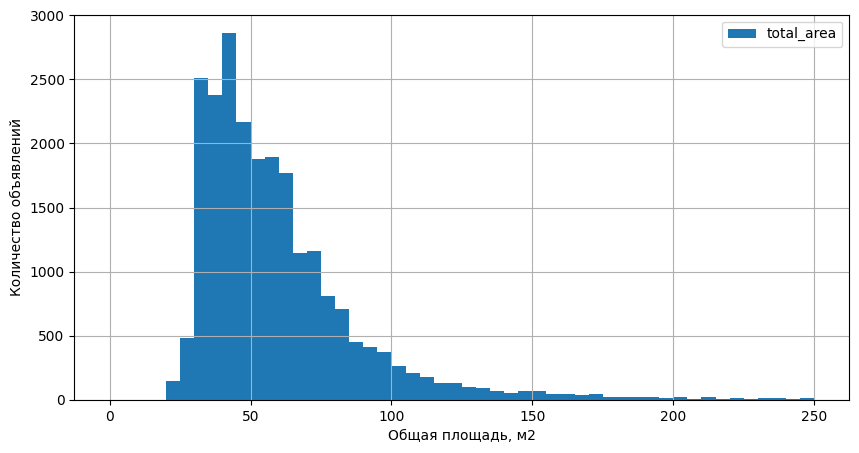

In [112]:
data.plot(kind='hist', y='total_area', bins=50, figsize=(10, 5), grid=True, range=(0, 250))
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество объявлений')

На гистограмме видно, что большую часть составляют квартиры с площадями от 40 до 70 м2. Так как мы установили порог значений до 250 м2, нельзя не заметить, что квартиры с площадью более 150 м2 реже встречаются в данном датасете

##### Построим гистограмму по столбцу 'living_area'

Text(0, 0.5, 'Количество объявлений')

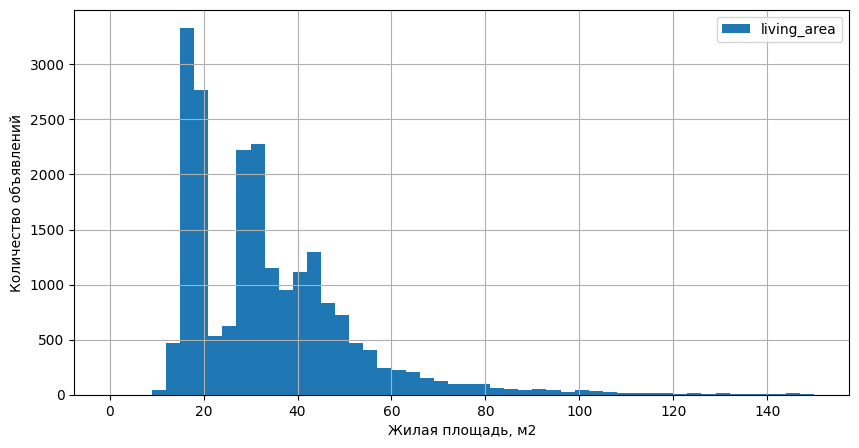

In [113]:
data.plot(kind='hist', y='living_area', bins=50, figsize=(10, 5), grid=True, range=(0, 150))
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество объявлений')

Большую часть составляют квартиры с жилой площадью от 18 до 20 м2. Среднее значение равно 30 м2 

##### Построим гистограмму по столбцу 'kitchen_area'

Text(0, 0.5, 'Количество объявлений')

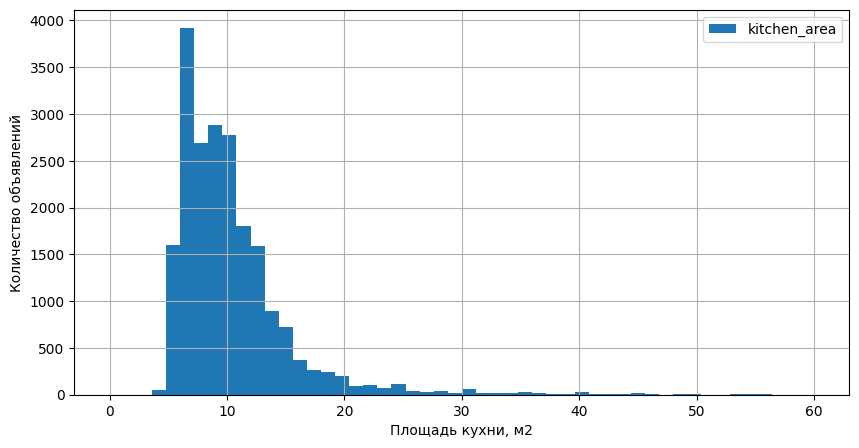

In [114]:
data.plot(kind='hist', y='kitchen_area', bins=50, figsize=(10, 5), grid=True, range=(0, 60))
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Количество объявлений')

Как показывает гистограмма, средняя площадь кухни в датасете варьируется от 7 до 9 м2 

##### Построим гистограмму по столбцу 'last_price'

Text(0, 0.5, 'Количество объявлений')

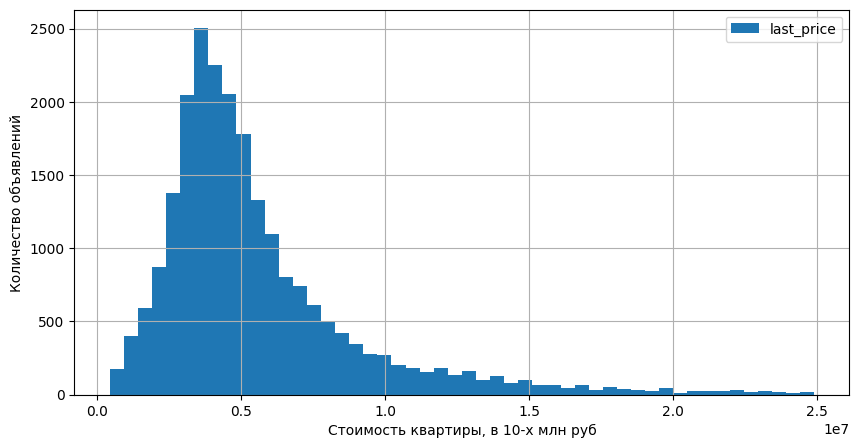

In [115]:
data.query('last_price < 25000000').plot(kind='hist', y='last_price', bins=50, figsize=(10, 5), grid=True)
plt.xlabel('Стоимость квартиры, в 10-х млн руб')
plt.ylabel('Количество объявлений')

Для наглядности ограничили диапазон до 25 000 000 рублей. Средняя стоимость квартир соответствует почти 5 000 000 рублей, минимальная стоимость находится в пределах полмиллиона рублей

##### Построим гистограмму по столбцу 'rooms'

Text(0, 0.5, 'Количество объявлений')

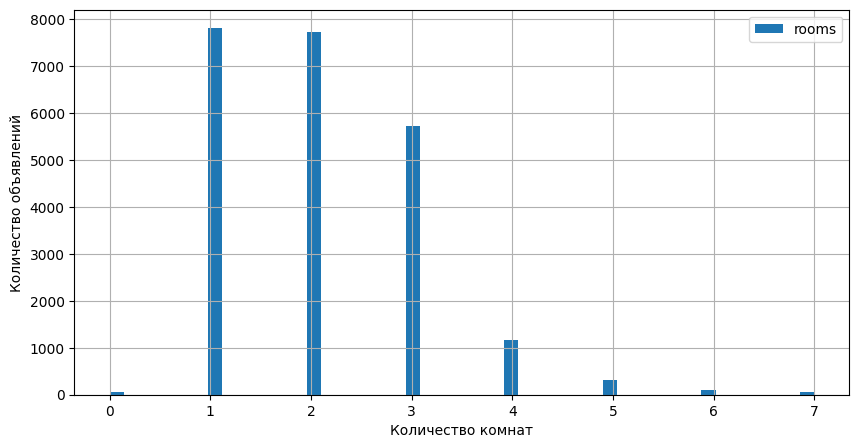

In [116]:
data.plot(kind='hist', y='rooms', bins=50, figsize=(10, 5), grid=True, range=(0, 7))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

На гистограмме явно видно, что большую часть данных  составляют 1-о, 2-х и 3-х комнатные квартиры, реже попадаются  4, 5 и так далее

##### Построим гистограмму по столбцу 'ceiling_height'

Text(0, 0.5, 'Количество объявлений')

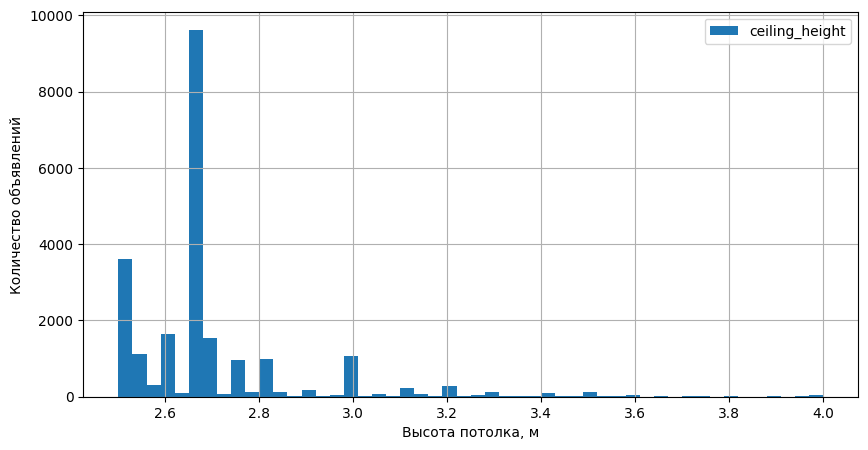

In [117]:
data.plot(kind='hist', y='ceiling_height', bins=50, figsize=(10, 5), grid=True, range=(2.5, 4))
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')

Средние значения равны ~ 2,7 м. Минимальные, соответственно, после предобработки - 2,5 м.

##### Построим гистограмму по столбцу 'floor'

Text(0, 0.5, 'Количество объявлений')

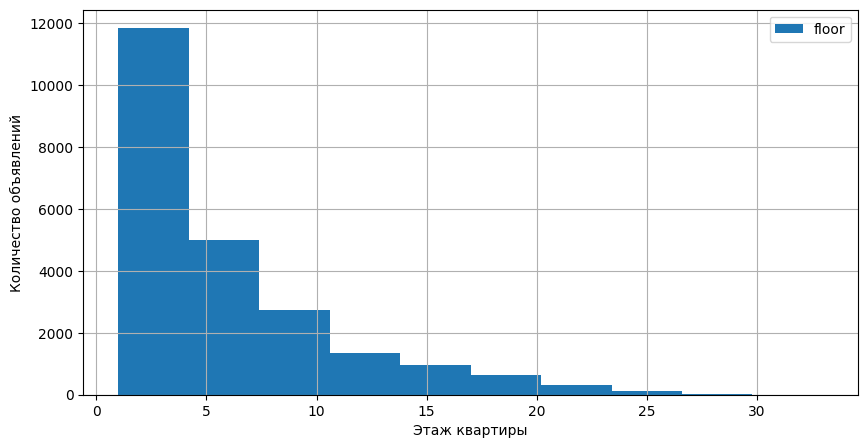

In [118]:
data.plot(kind='hist', y='floor', bins=10, figsize=(10, 5), grid=True)
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество объявлений')

Этажи с 1 по 4 составляют большую часть выборки, также с 5 по 10 занимают существенную долю данных

##### Построим гистограмму по столбцу 'floor_type'

Text(0, 0.5, 'Количество объявлений')

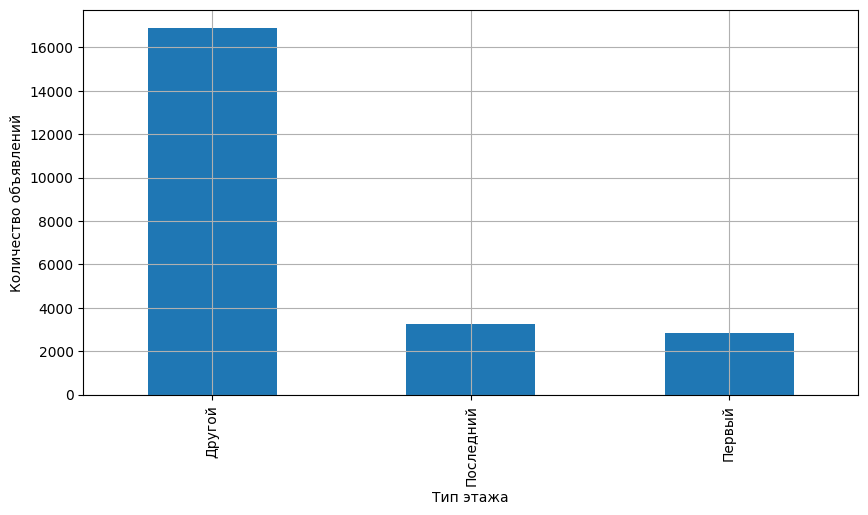

In [119]:
data_type = data['floor_type'].value_counts() 
data_type.plot(kind='bar', figsize=(10, 5), grid=True)
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')

Если рассматривать по типу этажа, то доля "Другой" занимает значительную часть датасета. 2-ое место по количеству объявлений почти поровну делится между "первым" и "последним" типами этажей

##### Построим гистограмму по столбцу 'floors_total'

Text(0, 0.5, 'Количество объявлений')

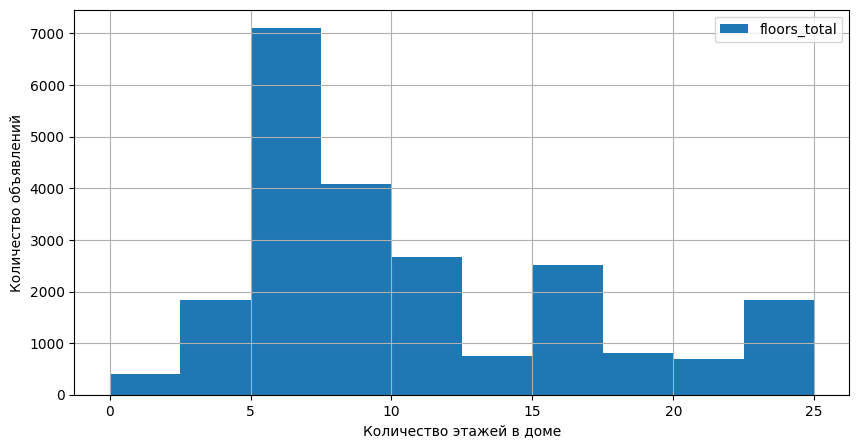

In [120]:
data.plot(kind='hist', y='floors_total', bins=10, figsize=(10, 5), grid=True, range=(0, 25))
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')

Среднее значение равно 9. Большую часть выборки составляет диапазон от 5 до 10 этажей

##### Построим гистограмму по столбцу 'city_centers_nearest'

Text(0, 0.5, 'Количество объявлений')

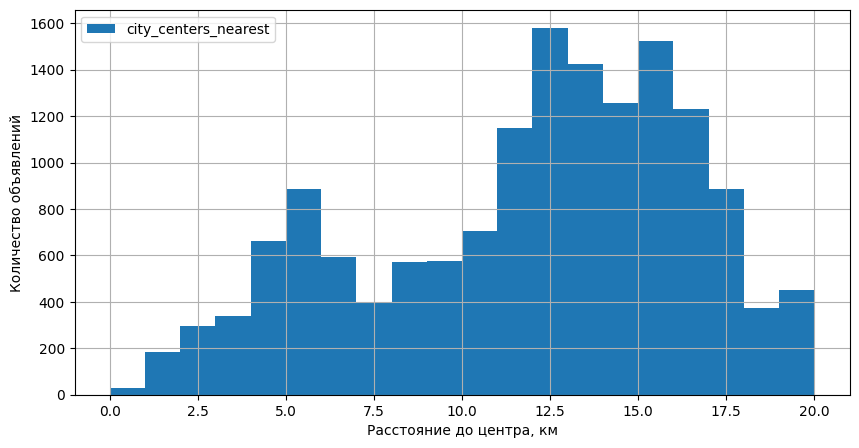

In [121]:
data_city_center = data.query('city_centers_nearest < 100')
data_city_center.plot(kind='hist', y='city_centers_nearest', bins=20, figsize=(10, 5), grid=True, range=(0, 20))
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Количество объявлений')

На гистограмме указан километраж до центра города "Санкт-Петербург", лимит установлен до 20 км. Большую часть данных занимают значения от 11 до 18 км. Так как мы установили заглушки равные 100 км, то медианное значение устойчиво к выбросам и равно 15 км. 

##### Построим гистограмму по столбцу 'airports_nearest'

Text(0, 0.5, 'Количество объявлений')

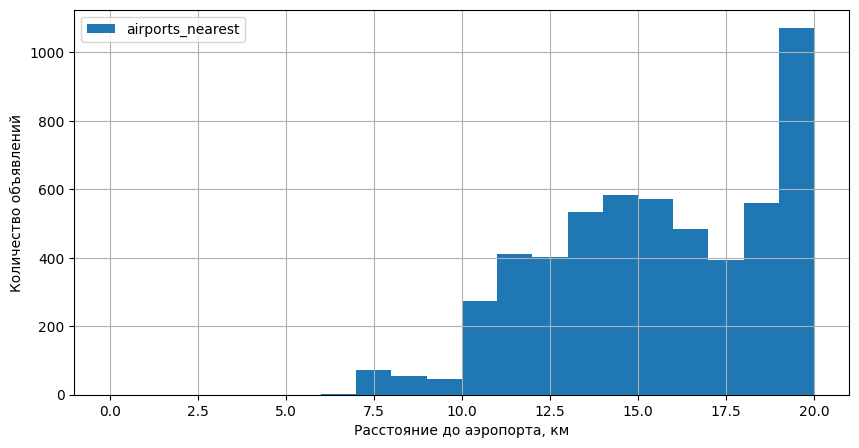

In [122]:
data_airports = data.query('airports_nearest < 100')
data_airports.plot(kind='hist', y='airports_nearest', bins=20, figsize=(10, 5), grid=True, range=(0, 20))
plt.xlabel('Расстояние до аэропорта, км')
plt.ylabel('Количество объявлений')

Медиманное значение равно 34 км. Ближайшие от аэропорта квартиры находятся в пределах 5-7 км. 

##### Построим гистограмму по столбцу 'parks_nearest'

Text(0, 0.5, 'Количество объявлений')

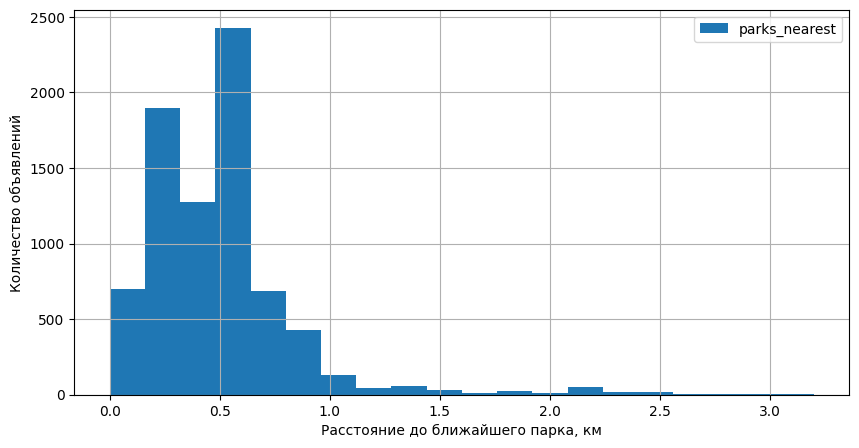

In [123]:
data_park = data.query('parks_nearest < 100')
data_park.plot(kind='hist', y='parks_nearest', bins=20, figsize=(10, 5), grid=True)
plt.xlabel('Расстояние до ближайшего парка, км')
plt.ylabel('Количество объявлений')

Максимальные значения равны 3 км. Медианное значение равно 500 м 

##### Построим гистограмму по столбцу 'weekday'

Text(0, 0.5, 'Количество объявлений')

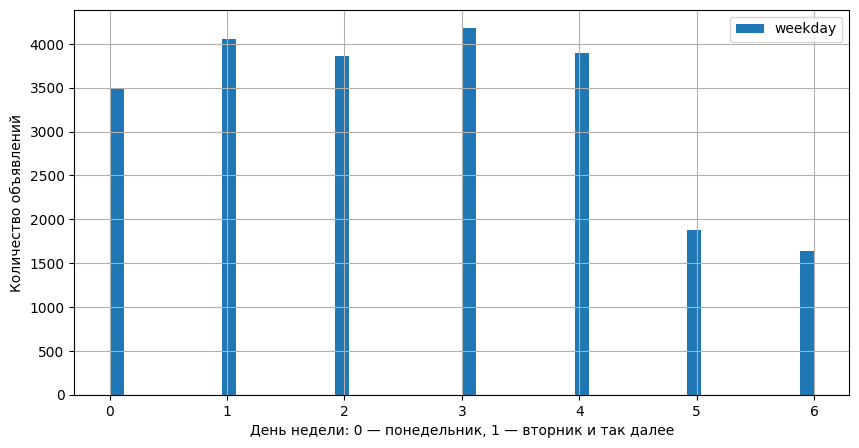

In [124]:
data.plot(kind='hist', y='weekday', bins=50, figsize=(10, 5), grid=True)
plt.xlabel('День недели: 0 — понедельник, 1 — вторник и так далее')
plt.ylabel('Количество объявлений')

Как видно на гистограмме большое количество объявлений создавалось в будние дни, меньше всего в выходные

##### Построим гистограмму по столбцу 'month'

<a id='month'></a>

Text(0, 0.5, 'Количество объявлений')

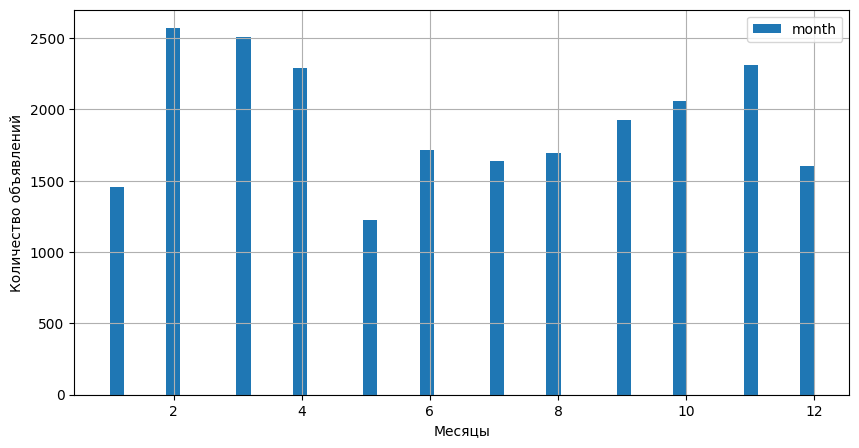

In [125]:
data.plot(kind='hist', y='month', bins=50, figsize=(10, 5), grid=True) 
plt.xlabel('Месяцы')
plt.ylabel('Количество объявлений')

По выведенной гистограмме можно охарактеризовать месяцы с наиболее активной публикацией объявлений. Февраль и март занимают лидирующие позиции, также можно отметить апрель и ноябрь; ближе к лету происходит небольшой спад, но потом опять виден подъем ближе к зимним месяцам 

#### Изучим, как быстро продавались квартиры

In [126]:
data_days = data.query('30 < days_exposition < 365')

In [127]:
data_days['days_exposition'].describe()

count   13298.00
mean      128.83
std        86.19
min        31.00
25%        60.00
50%       101.00
75%       180.00
max       364.00
Name: days_exposition, dtype: float64

In [128]:
print('Среднее значение - 129 дней')
print('Медианное значение - 101 день')

Среднее значение - 129 дней
Медианное значение - 101 день


Text(0, 0.5, 'Количество объявлений')

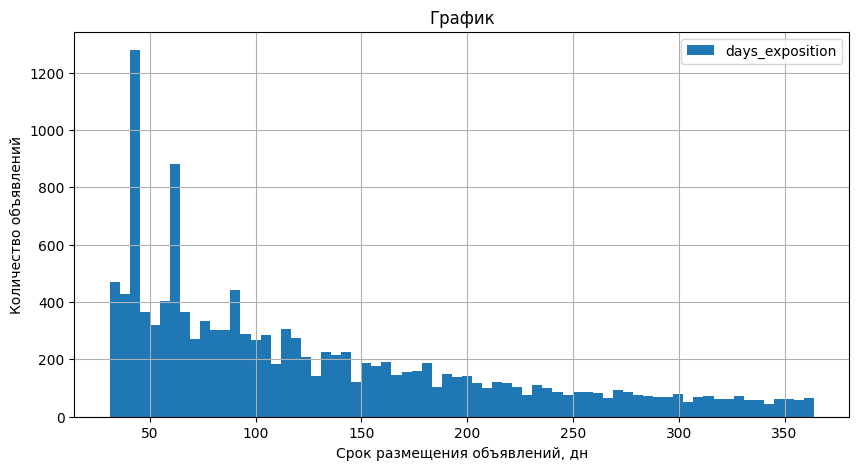

In [129]:
data_days.plot(kind='hist', y='days_exposition', bins=70, figsize=(10, 5), grid=True)
plt.title('График')
plt.xlabel('Срок размещения объявлений, дн')
plt.ylabel('Количество объявлений')

Медианное значение срока размещения объявления - 101 день. Быстрыми продажами можно считать значения от первого квартиля до второго - от 60 до 101 дня. Долгими продажами могут считаться те, что находятся в диапазоне от 3-го квартиля - 180 дней и далее. Выбросы и спады, видные на графике, возможно вызваны автоудалением объявлений. 

#### Выявим какие факторы больше влияют на общую (полную) стоимость объекта?

##### Выявим зависимость цены от общей площади

In [130]:
data_1 = data.query('last_price < 25000000 and total_area < 250')

In [131]:
# Выведем корреляцию для следующих столбцов
print(data_1['last_price'].corr(data_1['total_area']))

0.7872594903840898


Text(0, 0.5, 'Цена, в 10-х млн руб')

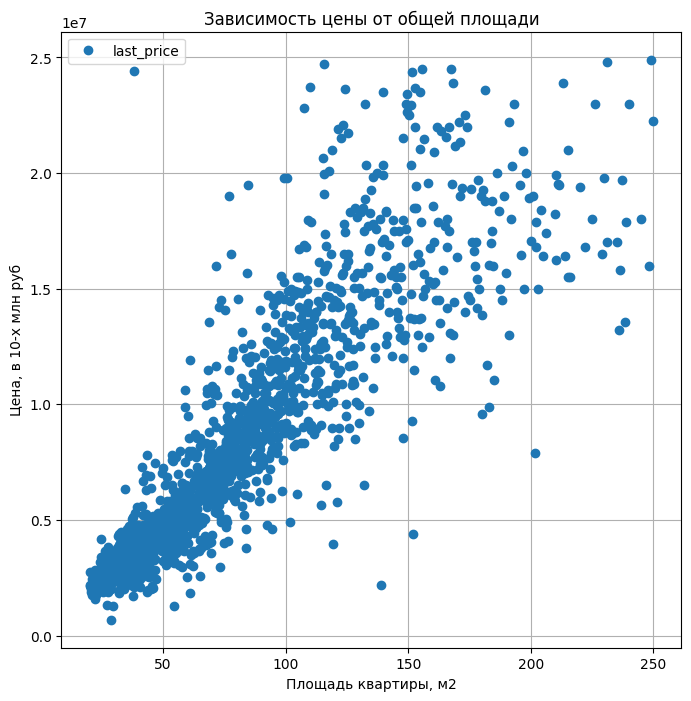

In [132]:
data_1.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(8, 8))
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Цена, в 10-х млн руб')

Как видно на диаграмме рассеивания площадь объекта прямо влияет на полную стоимость и имеет положительную корреляцию с ценой - 0,78

##### Выявим зависимость цены от жилой площади

In [133]:
# Выведем корреляцию для следующих столбцов
print(data_1['last_price'].corr(data_1['living_area']))

0.6932414043139372


Text(0, 0.5, 'Цена, в 10-х млн руб')

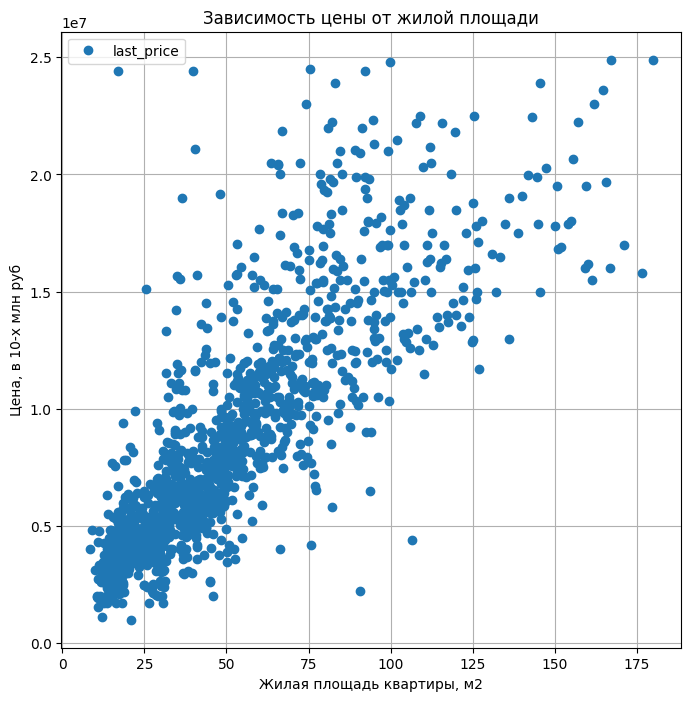

In [134]:
data_1.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(8, 8))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь квартиры, м2')
plt.ylabel('Цена, в 10-х млн руб')

Такая же положительная корреляция со стоимостью квартиры, как и у общей площади, но поменьше - 0,69; диаграмма рассеивания дает четкое представление по данной взаимосвязи

##### Выявим зависимость цены от площади кухни

In [135]:
# Выведем корреляцию для следующих столбцов
print(data_1['last_price'].corr(data_1['kitchen_area']))

0.6179194629015804


Text(0, 0.5, 'Цена, в 10-х млн руб')

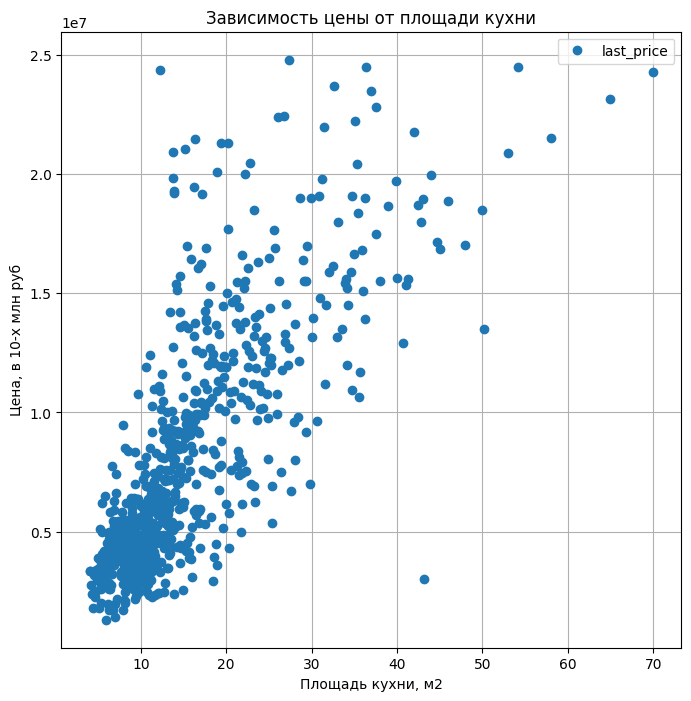

In [136]:
data_1.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(8, 8))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Цена, в 10-х млн руб')

Как видно на диаграмме, площадь кухни имеет также положительную корреляцию с ценой квартиры, но имеет наименьшее численное значение среди площадей - 0,61

##### Выявим зависимость цены от количества комнат

In [137]:
data_rooms = data.query('0 < rooms <= 8')

In [138]:
# Выведем корреляцию для следующих столбцов
print(data_rooms['last_price'].corr(data_rooms['rooms']))

0.36099347091527223


Text(0, 0.5, 'Цена, в 10-х млн руб')

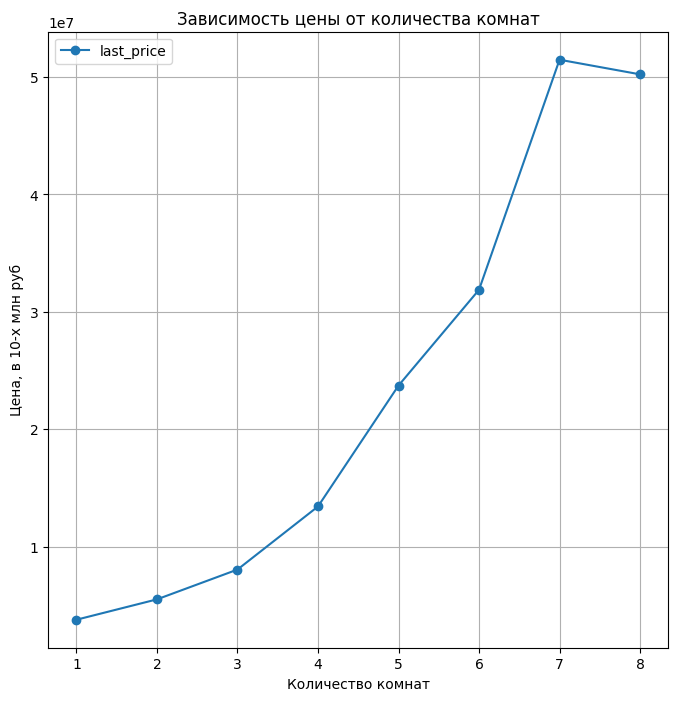

In [139]:
data_rooms.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(8, 8))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, в 10-х млн руб')

Большое количество комнат повышает цену объекта, график явно свидетельствует об этом. Коэффициент корреляции Пирсона в данном случае составляет 0,36

##### Выявим зависимость цены от этажа, на котором расположена квартира

Text(0, 0.5, 'Цена, в 10-х млн руб')

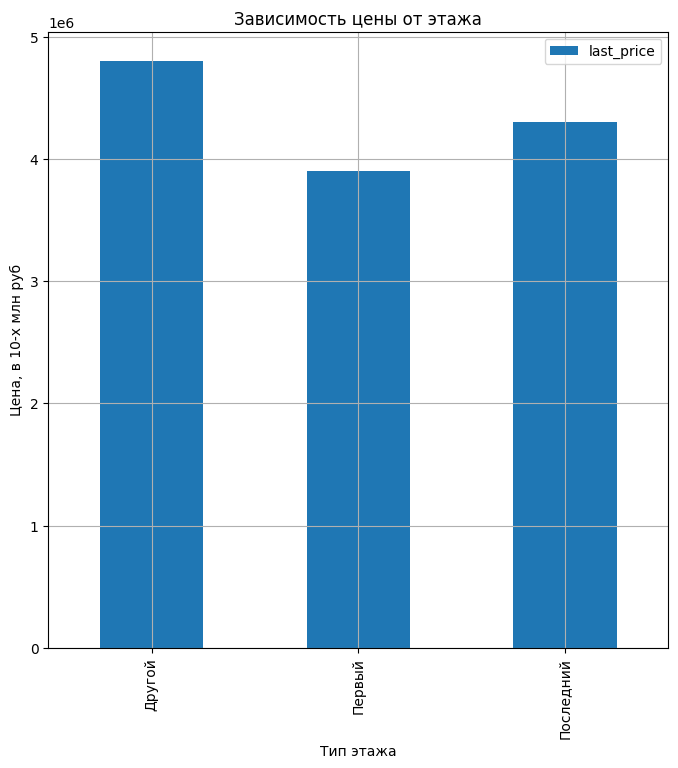

In [140]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', grid=True, figsize=(8, 8))
plt.title('Зависимость цены от этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена, в 10-х млн руб')

В данной выборке высокая стоимость характерна для квартир находящихся ни на первом, ни на последнем этажах. Низкая стоимость для квартир на первых этажах; квартиры на последнем этаже имеют среднюю ценовую позицию. Разность в стоимости может составлять от нескольких сот тысяч рублей до миллиона.

##### Выявим зависимость цены от даты размещения (день недели, месяц, год)

Text(0, 0.5, 'Цена, в 10-х млн руб')

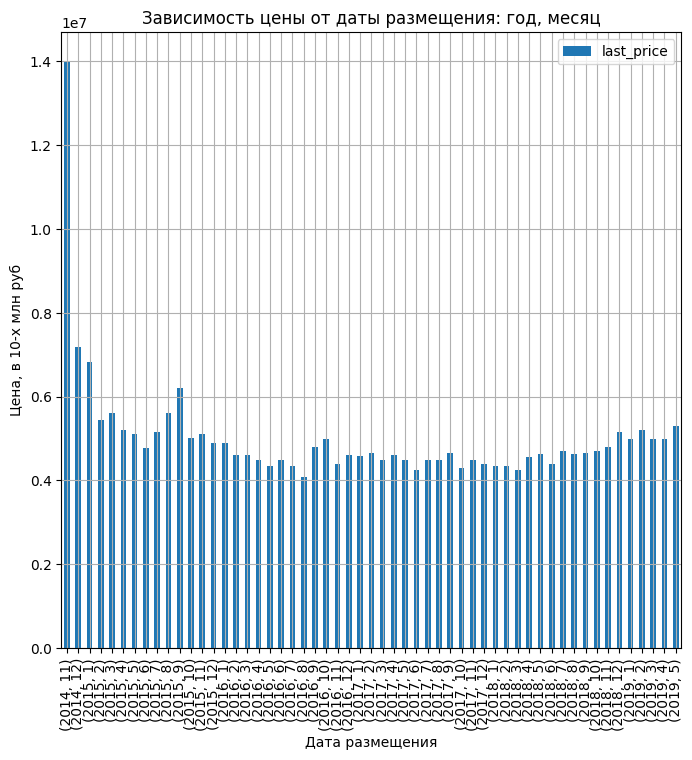

In [141]:
(data
 .pivot_table(index=['year', 'month'], values='last_price', aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(8, 8))
)
plt.title('Зависимость цены от даты размещения: год, месяц')
plt.xlabel('Дата размещения')
plt.ylabel('Цена, в 10-х млн руб')

Получилось сумбурно, рассмотрим графики по отдельности

Text(0, 0.5, 'Цена, в 10-х млн руб')

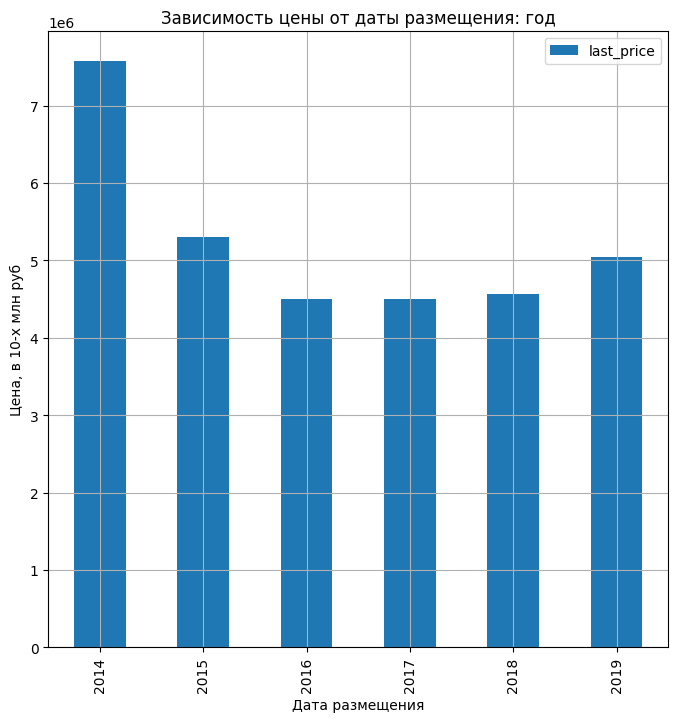

In [142]:
(data
 .pivot_table(index='year', values='last_price', aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(8, 8))
)
plt.title('Зависимость цены от даты размещения: год')
plt.xlabel('Дата размещения')
plt.ylabel('Цена, в 10-х млн руб')

По данному графику можно заметить измение цены по годам. Пик стоимости находится в 2014 году, а дальше происходит спад чередующийся с подъемами. Такое изменение цен обусловлено в большей степени экономической и политической ситуацией в стране и корректно проследить точную зависимость стоимости от года не получится.

Text(0, 0.5, 'Цена, в 10-х млн руб')

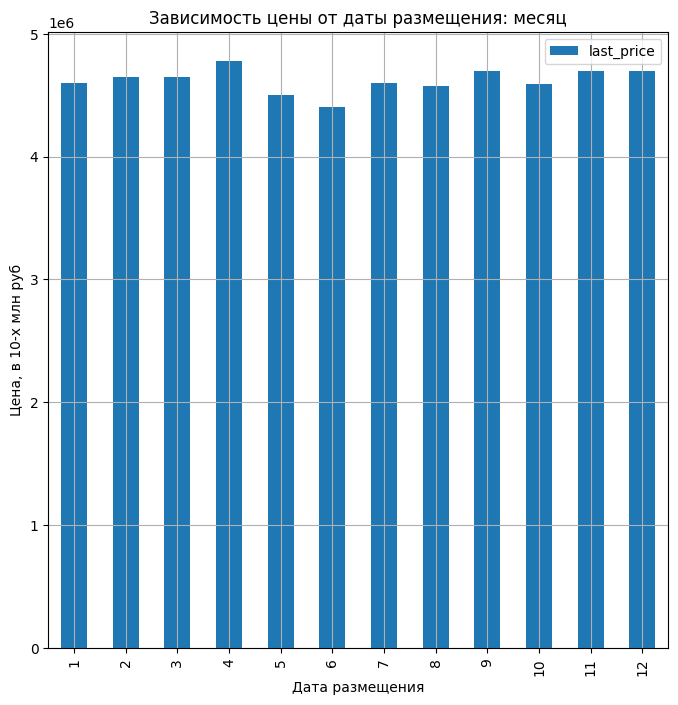

In [143]:
(data
 .pivot_table(index='month', values='last_price', aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(8, 8))
)
plt.title('Зависимость цены от даты размещения: месяц')
plt.xlabel('Дата размещения')
plt.ylabel('Цена, в 10-х млн руб')

Зависимость стоимости от месяца размещения не прослеживается, цена однородна по всем месяцам в году

Text(0, 0.5, 'Цена, в 10-х млн руб')

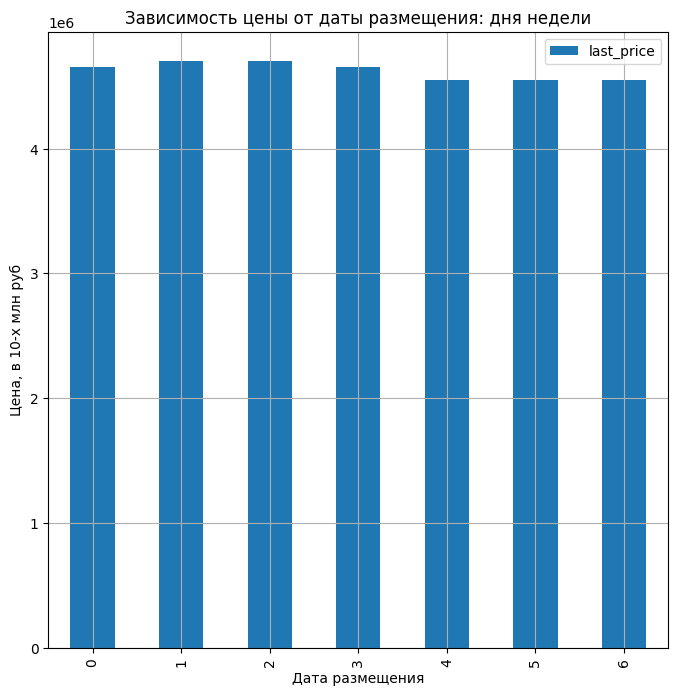

In [144]:
(data
 .pivot_table(index='weekday', values='last_price', aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(8, 8))
)
plt.title('Зависимость цены от даты размещения: дня недели')
plt.xlabel('Дата размещения')
plt.ylabel('Цена, в 10-х млн руб')

Как видно на графике, день недели публикации объявления не влияет на стоимость квартиры

#### Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [145]:
most_ad_locality = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', np.mean])\
                   .droplevel(1, axis=1)

most_ad_locality['mean'] = most_ad_locality['mean'].astype(int)
most_ad_locality_10 = most_ad_locality.sort_values(by='count',ascending=False).head(10)
print(most_ad_locality_10)
print('\nНаселённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург - ', most_ad_locality_10['mean'].max(), 'рублей')
print('\nНаселённый пункт с самой низкой стоимостью квадратного метра: Выборг - ', most_ad_locality_10['mean'].min(), 'рублей')

                 count    mean
locality_name                 
Санкт-Петербург  15272  114077
Мурино             561   85703
Кудрово            448   95327
Шушары             428   78219
Всеволожск         391   68504
Пушкин             358  102880
Колпино            336   75500
Парголово          311   89768
Гатчина            300   68572
Выборг             235   58238

Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург -  114077 рублей

Населённый пункт с самой низкой стоимостью квадратного метра: Выборг -  58238 рублей


Высокая стоимость за 1 м2, как и ожидалось, характерна для крупных городов/административных центров округа, в данном случае, это Санкт-Петербург. Низкая же стоимость характерна для небольшого города Выборг, находящегося на границе с Финляндией и с численностью населения 72000 человек.

#### Вычислим среднюю цену каждого километра в городе Санкт-Петербург

Text(0, 0.5, 'Средняя цена за 1 км, в 10-х млн руб')

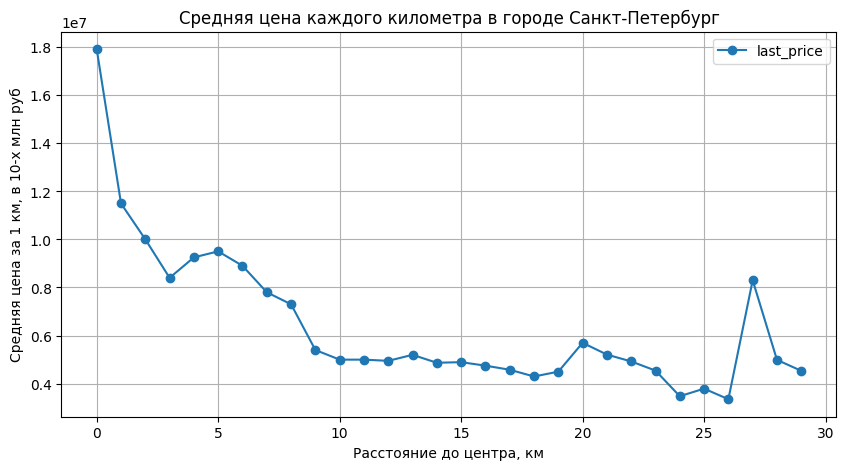

In [146]:
(data
 .query('locality_name == "Санкт-Петербург" and city_centers_nearest < 100')
 .pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.title('Средняя цена каждого километра в городе Санкт-Петербург')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за 1 км, в 10-х млн руб')

Как и ожидалось, чем недвижимость ближе к центру города, тем средняя стоимость увеличивается. Возрастание цены варьируется от сотни тысяч рублей до миллионов в промежутке от 30 км до 10 км от центра города. После 10 км ценник каждого км исчисляется миллионами рублей, а после 5 км цена достигает по 2-3 миллиона за 1 км. Всплески вызваны большой площадью недвижимости, благодаря которой формируется стоимость объекта   

### Общий вывод

Проведя полное исследование и подытожив результаты, мы можем выделить основные выводы для оценки рыночной стоимости недвижимости в будующем. 

**На полную стоимость недвижимости влияют:**
- **Месторасположение объекта (город размещения, удаленность от центра города, наличие в шаговой доступности объектов инфраструктуры).** 

В крупных городах или в административных центрах округа цена за 1м2 может отличаться от небольших городов/пгт/поселков в 2, а то и в 3 раза. Близость к центру города увеличивает стоимость в десятки-сотни тысяч рублей. Наличие близлежащих парков и других объектов социального досуга благотворно влияют на конечную цену объекта недвижимости.

- **Общая плошадь объекта, включая жилую и площадь кухни**

Общая площадь имеет положительную корреляцию от цены - 0.78, также и жилая - 0.69, и, соответственно, площадь кухни - 0.61; все они являются основополагающими факторами при формировании конечного ценника объекта, но в большей степени - Общая плошадь, коэффициент корреляции Пирсона не даст нам соврать. 

- **Количество комнат**

Количество комнат имеет прямую зависимость от Общей площади объекта, чем ее больше, тем больше конечное количество помещений и соответственно больше стоимость объекта

- **Этаж, на котором находится объект**

Квартиры, находящиеся не на "первом этаже" имеют увеличенную стоимость, "последний этаж" также не является самым предпочтительным вариантом, но не сильно занижает цену объекта недвижимости.